# Algoritmo Quântico Variacional

#### Exemplo de algorítmo quantico variacional


Na aula do Tiago sobre convoluções quanticas ele mostrou a codificação de pixels em qubits, o valor de pixel é associado aos ângulos das portas de rotação em x.

In [2]:
import random
from qiskit import *
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
patch = np.random.random(size=(1,2))
patch.flatten()

array([0.84451741, 0.34800854])

[[0.16078431 0.24705882 0.49803922 0.56078431 0.41960784 0.77254902
  0.77254902 0.92941176]
 [0.15294118 0.83137255 0.54509804 0.7372549  0.79215686 0.78431373
  0.78039216 0.79607843]
 [0.29019608 0.57254902 0.79215686 0.88235294 0.91372549 0.87058824
  0.79215686 0.76862745]
 [0.32941176 0.69803922 0.82352941 0.8745098  0.89019608 0.82745098
  0.82745098 0.57254902]
 [0.40392157 0.67058824 0.75686275 0.87843137 0.86666667 0.90196078
  0.83529412 0.56078431]
 [0.31764706 0.70588235 0.80784314 0.81960784 0.77647059 0.78431373
  0.79215686 0.34117647]
 [0.16078431 0.07843137 0.32941176 0.49803922 0.61960784 0.53333333
  0.54901961 0.17647059]
 [0.82352941 0.43529412 0.63921569 0.57647059 0.29803922 0.88235294
  0.3372549  0.44705882]]


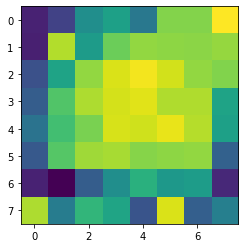

In [4]:
img = cv2.imread('a.png',0)
little_size = 8
img = cv2.resize(img,(little_size,little_size))
print(img/255)
plt.imshow(img)

In [5]:
import qiskit
from qiskit import QuantumCircuit
def transform_pixels_to_qubits(patch):
    qc = QuantumCircuit(2*little_size,2*little_size)
    patch = patch.flatten()
    for i in range(2*little_size):
        theta = 2.0*np.pi*patch[i]
        qc.rx(theta,i)
        qc.measure(i,i)
    return qc
qimg = transform_pixels_to_qubits(img)
qimg.draw()

┌─────────┐ ┌─┐                                             
 q_0: ┤ Rx(82π) ├─┤M├─────────────────────────────────────────────
      ├─────────┴┐└╥┘┌─┐                                          
 q_1: ┤ Rx(126π) ├─╫─┤M├──────────────────────────────────────────
      ├──────────┤ ║ └╥┘┌─┐                                       
 q_2: ┤ Rx(254π) ├─╫──╫─┤M├───────────────────────────────────────
      ├──────────┤ ║  ║ └╥┘┌─┐                                    
 q_3: ┤ Rx(286π) ├─╫──╫──╫─┤M├────────────────────────────────────
      ├──────────┤ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ┤ Rx(214π) ├─╫──╫──╫──╫─┤M├─────────────────────────────────
      ├──────────┤ ║  ║  ║  ║ └╥┘┌─┐                              
 q_5: ┤ Rx(394π) ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
      ├──────────┤ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_6: ┤ Rx(394π) ├─╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ├──────────┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q_7: ┤ Rx(474π) ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      ├─────────┬┘ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
 q_8: ┤ Rx(78π) ├──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
      ├─────────┴┐ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
 q_9: ┤ Rx(424π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
      ├──────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
q_10: ┤ Rx(278π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
      ├──────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
q_11: ┤ Rx(376π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
      ├──────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
q_12: ┤ Rx(404π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
      ├──────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
q_13: ┤ Rx(400π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ├──────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_14: ┤ Rx(398π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├──────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_15: ┤ Rx(406π) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      └──────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 16/═════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

{'0000000000000000': 8192}


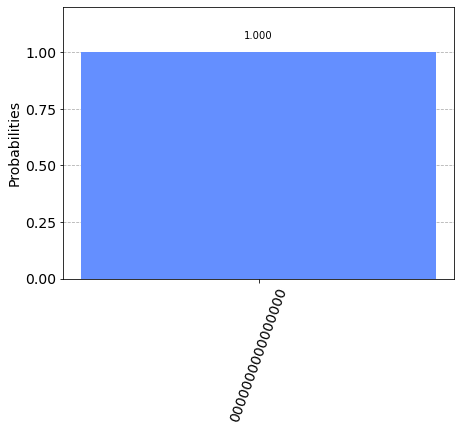

In [8]:
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
nshots = 8192
qimg = transform_pixels_to_qubits(img)
results = execute(qimg, backend=simulator, shots=nshots).result()
counts = results.get_counts(qimg)
print(counts)
plot_histogram(counts)

In [6]:
def conv_circ_1():# circuito de convolução
    qc = QuantumCircuit(2,2,name='QConvCircuit')
    for i in range(2):
        th = 2*np.pi*random.random()
        qc. ry(th,i)
    qc.cx(0,1)
    return qc
Cqc = conv_circ_1()
Cqc.draw()


┌────────────┐     
q_0: ┤ Ry(5.7183) ├──■──
     ├────────────┤┌─┴─┐
q_1: ┤ Ry(5.0528) ├┤ X ├
     └────────────┘└───┘
c: 2/═══════════════════

In [26]:
def conv_circ_1(little_size):
    qc = QuantumCircuit(2*little_size,2*little_size)
    for i in range(2*little_size):
        th = 2*np.pi*random.random()
        qc.ry(th,i)
        if i<15:
            qc.cx(i,i+1)
    return qc
Cqc = conv_circ_1(little_size)
Cqc.draw()

┌────────────┐                                                        »
 q_0: ┤ Ry(2.3305) ├──■─────────────────────────────────────────────────────»
      └────────────┘┌─┴─┐┌───────────┐                                      »
 q_1: ──────────────┤ X ├┤ Ry(2.093) ├──■───────────────────────────────────»
                    └───┘└───────────┘┌─┴─┐┌────────────┐                   »
 q_2: ────────────────────────────────┤ X ├┤ Ry(3.4352) ├──■────────────────»
                                      └───┘└────────────┘┌─┴─┐┌────────────┐»
 q_3: ───────────────────────────────────────────────────┤ X ├┤ Ry(1.3878) ├»
                                                         └───┘└────────────┘»
 q_4: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_5: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_6: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_7: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_8: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_9: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_10: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_11: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_12: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_13: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_14: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_15: ──────────────────────────────────────────────────────────────────────»
                                                                            »
c: 16/══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                   »
« q_0: ─────────────────────────────────────────────────────────────»
«                                                                   »
« q_1: ─────────────────────────────────────────────────────────────»
«                                                                   »
« q_2: ─────────────────────────────────────────────────────────────»
«                                                                   »
« q_3: ──■──────────────────────────────────────────────────────────»
«      ┌─┴─┐┌────────────┐                                          »
« q_4: ┤ X ├┤ Ry(4.5009) ├──■───────────────────────────────────────»
«      └───┘└────────────┘┌─┴─┐┌────────────┐                       »
« q_5: ───────────────────┤ X ├┤ Ry(3.2462) ├──■────────────────────»
«                         └───┘└────────────┘┌─┴─┐┌───────────┐     »
« q_6: ──────────────────────────────────────┤ X ├┤ Ry(3.375) ├──■──»
«                                            └───┘└───────────┘┌─┴─┐»
« q_7: ────────────────────────────────────────────────────────┤ X ├»
«                                                              └───┘»
« q_8: ─────────────────────────────────────────────────────────────»
«               

##### Dúvidas

* Os angulos gerados aleatóriamente são uns dos parâmetros otimizaveis ?
* Como que é salvo o valor dos ângulos gerados aleatóriamente ? ( dict? json? )
* Até em que momento podemos utilizar o simulador para treinar esses parâmetros ?
* Qual é o limite qubits que podemos ter no simulador ?